In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [3]:
# # To plot pretty figures
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# # Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "ml_exercise"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "../datasets/images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Path to the folder containing CSV files
folder_path = '../datasets/sensor_data/Amarillo/6hrs_avg/*.csv'

# Use glob to get all CSV files in the folder
csv_files = glob.glob(folder_path)

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
sensor_amarillo = pd.concat(dfs, ignore_index=True)

sensor_nashville

In [5]:
sensor_amarillo.columns

Index(['time_stamp', 'sensor_index', 'humidity_a', 'humidity_b',
       'temperature_a', 'temperature_b', 'pressure_a', 'pressure_b',
       'pm2.5_atm_a', 'pm2.5_atm_b', 'pm2.5_cf_1_a', 'pm2.5_cf_1_b'],
      dtype='object')

In [6]:
# sensor_nashville.to_csv('../datasets/sensor_nashville.csv')

In [7]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# sensor_amarillo.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
# plt.show()

In [8]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load your dataset
# sensor_amarillo_dropped_na=sensor_amarillo.dropna(axis=1)
# sensor_amarillo_selected = sensor_amarillo_dropped_na.drop(columns=['time_stamp','sensor_index','pm2.5_atm_a', 'pm2.5_atm_b'])

# # Calculate the correlation matrix
# correlation_matrix = sensor_amarillo_selected.corr()

# # Visualize the correlation matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

In [9]:
sensor_amarillo = sensor_amarillo.drop(columns=['humidity_b','temperature_b', 'pressure_b'])

In [10]:
sensor_amarillo['time_stamp'] = pd.to_datetime(sensor_amarillo['time_stamp'])

In [11]:
sensor_amarillo.set_index('time_stamp', inplace=True)

In [12]:
sensor_amarillo.sort_index(inplace=True)

<Axes: xlabel='time_stamp'>

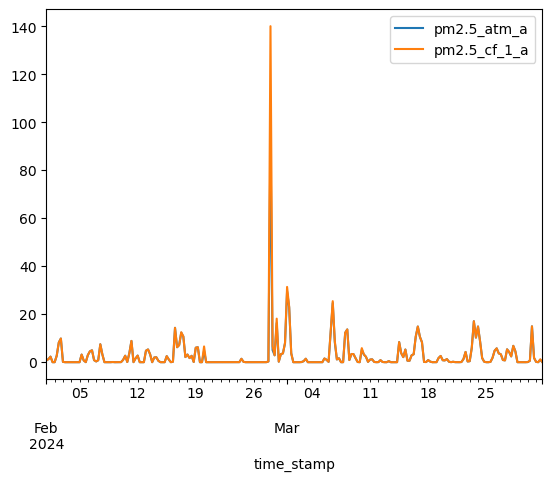

In [13]:
columns_to_plot = ['pm2.5_atm_a', 'pm2.5_cf_1_a']
sensor_amarillo_a = sensor_amarillo[columns_to_plot]
sensor_amarillo_a.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

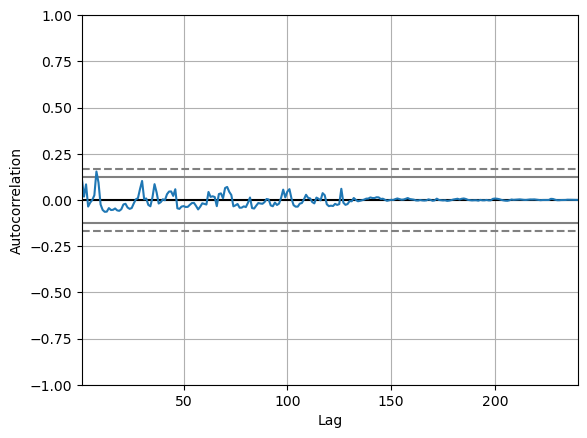

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sensor_amarillo_a['pm2.5_cf_1_a'])

<Axes: xlabel='time_stamp'>

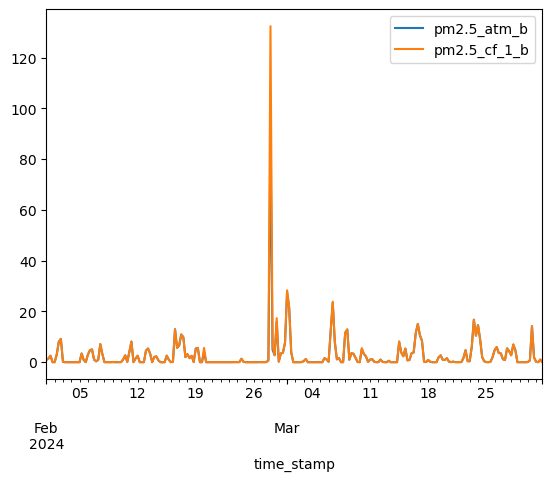

In [15]:
columns_to_plot = ['pm2.5_atm_b', 'pm2.5_cf_1_b']
sensor_amarillo_b = sensor_amarillo[columns_to_plot]
sensor_amarillo_b.plot()

In [16]:
sensor_amarillo_a.to_csv('../datasets/sensor_data/amarillo_a.csv')

In [17]:
sensor_amarillo.to_csv('../datasets/sensor_data/amarillo.csv')